## My Identity
**Nama:** NAFIATUL FADLILAH <br>


## About Dataset

Features: <br>
 ● customerID : Customer ID <br>
 ● Gender:Whether the customer is a male or a female <br>
 ● SeniorCitizen : Whether the customer is a senior citizen or not (1, 0) <br>
 ● Partner : Whether the customer has a partner or not (Yes, No) <br>
 ● Dependents : Whether the customer has dependents or not (Yes, No) <br>
 ● Tenure: Number of months the customer has stayed with the company <br>
 ● PhoneService : Whether the customer has a phone service or not (Yes, No) <br>
 ● MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service) <br>
 ● InternetService : Customer’s internet service provider (DSL, Fiber optic, No) <br>
 ● OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service) <br>

#### Other Perspectives

Untuk memprediksi customer churn menggunakan algoritma klasifikasi, kita perlu memilih fitur-fitur yang relevan dan berpotensi mempengaruhi keputusan churn. Berikut adalah beberapa fitur yang perlu dipertimbangkan:

1. **SeniorCitizen**:
   - Fitur ini menunjukkan apakah pelanggan adalah senior citizen (pensiunan) atau bukan.
   - Mungkin memiliki pengaruh pada keputusan churn.

2. **tenure**:
   - Fitur ini mengindikasikan berapa lama pelanggan telah menggunakan layanan.
   - Durasi pelanggan menggunakan layanan dapat memengaruhi keputusan churn.

3. **MonthlyCharges**:
   - Fitur ini menunjukkan biaya bulanan yang dibebankan kepada pelanggan.
   - Biaya yang tinggi atau tidak sesuai dengan ekspektasi pelanggan dapat memengaruhi keputusan churn.

4. **TotalCharges**:
   - Fitur ini menunjukkan total biaya yang telah dibayarkan oleh pelanggan selama menggunakan layanan.
   - Total biaya dapat menjadi faktor penting dalam keputusan churn.

5. **Contract**:
   - Fitur ini menunjukkan jenis kontrak yang dimiliki oleh pelanggan (misalnya, kontrak bulanan, tahunan, dua tahunan).
   - Jenis kontrak dapat memengaruhi keputusan churn.

6. **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**:
   - Fitur-fitur ini menunjukkan status layanan internet dan fitur tambahan yang digunakan oleh pelanggan.
   - Ketidakpuasan dengan layanan atau fitur tambahan dapat memengaruhi keputusan churn.

7. **PaymentMethod**:
   - Fitur ini menunjukkan metode pembayaran yang digunakan oleh pelanggan.
   - Metode pembayaran dapat memengaruhi keputusan churn.

8. **PaperlessBilling**:
   - Fitur ini menunjukkan apakah pelanggan menggunakan tagihan elektronik atau kertas.
   - Preferensi pelanggan terhadap metode tagihan dapat memengaruhi keputusan churn.

Semua fitur di atas perlu dievaluasi lebih lanjut untuk memahami dampaknya terhadap keputusan churn. Selain itu, ada beberapa fitur lain yang akan digunakan untuk untuk memprediksi customer churn.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# for splitting dataset into train data and test data
from sklearn.model_selection import train_test_split

# for encoding categorical data
from sklearn.preprocessing import OneHotEncoder

# for handling imbalanced dataset using undersampling
from imblearn.under_sampling import RandomUnderSampler

# for handling imbalanced dataset using oversampling (smote)
from imblearn.over_sampling import RandomOverSampler, SMOTE

# for modelling (classification)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Preprocessing

### Loading the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# initialize directory path
path = "/content/drive/MyDrive/HandsOn_Pandas/data_tugas.csv"

In [4]:
df = pd.read_csv(path)
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking the Data & Handling Treatment

#### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Dropping Irrelevant Column

In [7]:
df = df.drop(['customerID', 'gender'], axis = 1)
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Changing Dtype

In [8]:
# Mengubah tipe data kolom SeniorCitizen dan tenure menjadi int64
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int64')
df['tenure'] = df['tenure'].astype('int64')

# Mengubah tipe data kolom TotalCharges menjadi float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')

# Tampilkan hasil
print(df.dtypes)

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


#### Descriptive Statistic

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Possible Missing Values

In [10]:
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Handling Missing Values

In [11]:
# replace missing value in TotalCharges using median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)

# checking again
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Categorical Data Encoding

##### Label Encoding

In [12]:
# bukan ordinal label encoding jadi tidak berdampak ke pembobotan
def label_encoding_col(x):
  if x == 'No':
    return 0
  elif x == 'Yes':
    return 1

In [13]:
df['Partner'] = df['Partner'].apply(label_encoding_col)
df['Dependents'] = df['Dependents'].apply(label_encoding_col)
df['PhoneService'] = df['PhoneService'].apply(label_encoding_col)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(label_encoding_col)
df['Churn'] = df['Churn'].apply(label_encoding_col)

df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


##### One-Hot Encoding

In [14]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [15]:
# Lakukan one-hot encoding pada kolom 'MultipleLines'
encoder_MultipleLines = pd.DataFrame(encoder.fit_transform(df[['MultipleLines']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_MultipleLines = df.join(encoder_MultipleLines)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_MultipleLines.drop('MultipleLines', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_MultipleLines.rename(columns={0: 'No phone service', 1 : 'No (MultipleLines)', 2 : 'Yes (MultipleLines)'}, inplace = True)

# Tampilkan hasil
dfafter_MultipleLines.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,No (MultipleLines),Yes (MultipleLines)
0,0,1,0,1,0,DSL,No,Yes,No,No,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0.0,1.0,0.0
1,0,0,0,34,1,DSL,Yes,No,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,1.0,0.0,0.0
2,0,0,0,2,1,DSL,Yes,Yes,No,No,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,0.0,0.0
3,0,0,0,45,0,DSL,Yes,No,Yes,Yes,...,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0,0.0
4,0,0,0,2,1,Fiber optic,No,No,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0,0.0


In [16]:
# Lakukan one-hot encoding pada kolom 'InternetService'
encoder_InternetService = pd.DataFrame(encoder.fit_transform(dfafter_MultipleLines[['InternetService']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_InternetService = dfafter_MultipleLines.join(encoder_InternetService)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_InternetService.drop('InternetService', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_InternetService.rename(columns={0: 'DSL', 1 : 'Fiber optic', 2 : 'No (InternetService)'}, inplace = True)

# Tampilkan hasil
dfafter_InternetService.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,No (MultipleLines),Yes (MultipleLines),DSL,Fiber optic,No (InternetService)
0,0,1,0,1,0,No,Yes,No,No,No,...,Electronic check,29.85,29.85,0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,Yes,No,Yes,No,No,...,Mailed check,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,2,1,Yes,Yes,No,No,No,...,Mailed check,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,0,Yes,No,Yes,Yes,No,...,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,2,1,No,No,No,No,No,...,Electronic check,70.70,151.65,1,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Lakukan one-hot encoding pada kolom 'OnlineSecurity'
encoder_OnlineSecurity = pd.DataFrame(encoder.fit_transform(dfafter_InternetService[['OnlineSecurity']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_OnlineSecurity = dfafter_InternetService.join(encoder_OnlineSecurity)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_OnlineSecurity.drop('OnlineSecurity', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_OnlineSecurity.rename(columns={0: 'No (OnlineSecurity)', 1 : 'Yes (OnlineSecurity)', 2 : 'No internet service (OnlineSecurity)'}, inplace = True)

# Tampilkan hasil
dfafter_OnlineSecurity.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Churn,No phone service,No (MultipleLines),Yes (MultipleLines),DSL,Fiber optic,No (InternetService),No (OnlineSecurity),Yes (OnlineSecurity),No internet service (OnlineSecurity)
0,0,1,0,1,0,Yes,No,No,No,No,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,No,Yes,No,No,No,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,Yes,No,No,No,No,...,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,No,Yes,Yes,No,No,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,2,1,No,No,No,No,No,...,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
# Lakukan one-hot encoding pada kolom 'OnlineBackup'
encoder_OnlineBackup = pd.DataFrame(encoder.fit_transform(dfafter_OnlineSecurity[['OnlineBackup']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_OnlineBackup = dfafter_OnlineSecurity.join(encoder_OnlineBackup)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_OnlineBackup.drop('OnlineBackup', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_OnlineBackup.rename(columns={0: 'Yes (OnlineBackup)', 1 : 'No (OnlineBackup)', 2 : 'No internet service (OnlineBackup)'}, inplace = True)

# Tampilkan hasil
dfafter_OnlineBackup.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Yes (MultipleLines),DSL,Fiber optic,No (InternetService),No (OnlineSecurity),Yes (OnlineSecurity),No internet service (OnlineSecurity),Yes (OnlineBackup),No (OnlineBackup),No internet service (OnlineBackup)
0,0,1,0,1,0,No,No,No,No,Month-to-month,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,34,1,Yes,No,No,No,One year,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,0,2,1,No,No,No,No,Month-to-month,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0,0,45,0,Yes,Yes,No,No,One year,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0,0,2,1,No,No,No,No,Month-to-month,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# Lakukan one-hot encoding pada kolom 'DeviceProtection'
encoder_DeviceProtection = pd.DataFrame(encoder.fit_transform(dfafter_OnlineBackup[['DeviceProtection']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_DeviceProtection = dfafter_OnlineBackup.join(encoder_DeviceProtection)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_DeviceProtection.drop('DeviceProtection', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_DeviceProtection.rename(columns={0: 'No (DeviceProtection)', 1 : 'Yes (DeviceProtection)', 2 : 'No internet service (DeviceProtection)'}, inplace = True)

# Tampilkan hasil
dfafter_DeviceProtection.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,No (InternetService),No (OnlineSecurity),Yes (OnlineSecurity),No internet service (OnlineSecurity),Yes (OnlineBackup),No (OnlineBackup),No internet service (OnlineBackup),No (DeviceProtection),Yes (DeviceProtection),No internet service (DeviceProtection)
0,0,1,0,1,0,No,No,No,Month-to-month,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,34,1,No,No,No,One year,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,No,No,No,Month-to-month,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,45,0,Yes,No,No,One year,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,2,1,No,No,No,Month-to-month,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# Lakukan one-hot encoding pada kolom 'TechSupport'
encoder_TechSupport = pd.DataFrame(encoder.fit_transform(dfafter_DeviceProtection[['TechSupport']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_TechSupport = dfafter_DeviceProtection.join(encoder_TechSupport)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_TechSupport.drop('TechSupport', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_TechSupport.rename(columns={0: 'No (TechSupport)', 1 : 'Yes (TechSupport)', 2 : 'No internet service (TechSupport)'}, inplace = True)

# Tampilkan hasil
dfafter_TechSupport.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,No internet service (OnlineSecurity),Yes (OnlineBackup),No (OnlineBackup),No internet service (OnlineBackup),No (DeviceProtection),Yes (DeviceProtection),No internet service (DeviceProtection),No (TechSupport),Yes (TechSupport),No internet service (TechSupport)
0,0,1,0,1,0,No,No,Month-to-month,1,Electronic check,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,No,No,One year,0,Mailed check,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,0,2,1,No,No,Month-to-month,1,Mailed check,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,0,No,No,One year,0,Bank transfer (automatic),...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,0,2,1,No,No,Month-to-month,1,Electronic check,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# Lakukan one-hot encoding pada kolom 'StreamingTV'
encoder_StreamingTV = pd.DataFrame(encoder.fit_transform(dfafter_TechSupport[['StreamingTV']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_StreamingTV= dfafter_TechSupport.join(encoder_StreamingTV)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_StreamingTV.drop('StreamingTV', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_StreamingTV.rename(columns={0: 'No (StreamingTV)', 1 : 'Yes (StreamingTV)', 2 : 'No internet service (StreamingTV)'}, inplace = True)

# Tampilkan hasil
dfafter_StreamingTV.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,No internet service (OnlineBackup),No (DeviceProtection),Yes (DeviceProtection),No internet service (DeviceProtection),No (TechSupport),Yes (TechSupport),No internet service (TechSupport),No (StreamingTV),Yes (StreamingTV),No internet service (StreamingTV)
0,0,1,0,1,0,No,Month-to-month,1,Electronic check,29.85,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,No,One year,0,Mailed check,56.95,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,2,1,No,Month-to-month,1,Mailed check,53.85,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,0,No,One year,0,Bank transfer (automatic),42.30,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0,0,2,1,No,Month-to-month,1,Electronic check,70.70,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Lakukan one-hot encoding pada kolom 'StreamingMovies'
encoder_StreamingMovies = pd.DataFrame(encoder.fit_transform(dfafter_StreamingTV[['StreamingMovies']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_StreamingMovies = dfafter_StreamingTV.join(encoder_StreamingMovies)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_StreamingMovies.drop('StreamingMovies', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_StreamingMovies.rename(columns={0: 'No (StreamingMovies)', 1 : 'Yes (StreamingMovies)', 2 : 'No internet service (StreamingMovies)'}, inplace = True)

# Tampilkan hasil
dfafter_StreamingMovies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,No internet service (DeviceProtection),No (TechSupport),Yes (TechSupport),No internet service (TechSupport),No (StreamingTV),Yes (StreamingTV),No internet service (StreamingTV),No (StreamingMovies),Yes (StreamingMovies),No internet service (StreamingMovies)
0,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,One year,0,Mailed check,56.95,1889.50,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# Lakukan one-hot encoding pada kolom 'Contract'
encoder_Contract = pd.DataFrame(encoder.fit_transform(dfafter_StreamingMovies[['Contract']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_Contract = dfafter_StreamingMovies.join(encoder_Contract)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_Contract.drop('Contract', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_Contract.rename(columns={0: 'Month-to-month', 1 : 'One year', 2 : 'Two year'}, inplace = True)

# Tampilkan hasil
dfafter_Contract.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,No internet service (TechSupport),No (StreamingTV),Yes (StreamingTV),No internet service (StreamingTV),No (StreamingMovies),Yes (StreamingMovies),No internet service (StreamingMovies),Month-to-month,One year,Two year
0,0,1,0,1,0,1,Electronic check,29.85,29.85,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,34,1,0,Mailed check,56.95,1889.50,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,2,1,1,Mailed check,53.85,108.15,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,2,1,1,Electronic check,70.70,151.65,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Lakukan one-hot encoding pada kolom 'PaymentMethod'
encoder_PaymentMethod = pd.DataFrame(encoder.fit_transform(dfafter_Contract[['PaymentMethod']]).toarray())

# Gabungkan kolom hasil one-hot encoding dengan DataFrame asli
dfafter_PaymentMethod = dfafter_Contract.join(encoder_PaymentMethod)

# Hapus kolom asli 'PaymentMethod' dan 'Amount'
dfafter_PaymentMethod.drop('PaymentMethod', axis=1, inplace=True)

# Rename kolom agar lebih mudah dibaca
dfafter_PaymentMethod.rename(columns={0: 'Electronic check', 1 : 'Mailed check', 2 : 'Bank transfer (automatic)', 3 : 'Credit card (automatic)'}, inplace = True)

# Tampilkan hasil
dfafter_PaymentMethod.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No phone service,...,No (StreamingMovies),Yes (StreamingMovies),No internet service (StreamingMovies),Month-to-month,One year,Two year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,0,1,0,1,0,1,29.85,29.85,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,56.95,1889.50,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,53.85,108.15,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,42.30,1840.75,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,1,70.70,151.65,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Reindexing Columns

In [25]:
urutan_baru = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'No phone service', 'No (MultipleLines)',
               'Yes (MultipleLines)', 'DSL', 'Fiber optic', 'No (InternetService)', 'No (OnlineSecurity)', 'Yes (OnlineSecurity)',
               'No internet service (OnlineSecurity)', 'No (OnlineBackup)', 'Yes (OnlineBackup)', 'No internet service (OnlineBackup)',
               'No (DeviceProtection)', 'Yes (DeviceProtection)', 'No internet service (DeviceProtection)', 'No (TechSupport)',
               'Yes (TechSupport)', 'No internet service (TechSupport)', 'No (StreamingTV)', 'Yes (StreamingTV)',
               'No internet service (StreamingTV)', 'No (StreamingMovies)', 'Yes (StreamingMovies)', 'No internet service (StreamingMovies)',
               'Month-to-month', 'One year', 'Two year', 'PaperlessBilling', 'Electronic check', 'Mailed check', 'Bank transfer (automatic)',
               'Credit card (automatic)', 'MonthlyCharges', 'TotalCharges', 'Churn']

final_df = dfafter_PaymentMethod.reindex(columns=urutan_baru)

final_df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,No phone service,No (MultipleLines),Yes (MultipleLines),DSL,Fiber optic,...,One year,Two year,PaperlessBilling,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,29.85,29.85,0
1,0,0,0,34,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0,0.0,0.0,0.0,1.0,56.95,1889.50,0
2,0,0,0,2,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0.0,0.0,0.0,1.0,53.85,108.15,1
3,0,0,0,45,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0,1.0,0.0,0.0,0.0,42.30,1840.75,0
4,0,0,0,2,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,70.70,151.65,1


In [26]:
print(final_df.dtypes)

SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
No phone service                          float64
No (MultipleLines)                        float64
Yes (MultipleLines)                       float64
DSL                                       float64
Fiber optic                               float64
No (InternetService)                      float64
No (OnlineSecurity)                       float64
Yes (OnlineSecurity)                      float64
No internet service (OnlineSecurity)      float64
No (OnlineBackup)                         float64
Yes (OnlineBackup)                        float64
No internet service (OnlineBackup)        float64
No (DeviceProtection)                     float64
Yes (DeviceProtection)                    float64
No internet service (DeviceProtection)    float64


#### Possible Imbalanced Dataset

In [27]:
final_df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [28]:
# percentage label 0
(len(final_df[final_df['Churn']== 0])/len(final_df))*100

73.4630129206304

In [29]:
# percentage label 1
(len(final_df[final_df['Churn']== 1])/len(final_df))*100

26.536987079369588

#### Splitting Train Data and Test Data

In [30]:
X = final_df.iloc[:,:-1]
y = final_df["Churn"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Handling Imbalanced Dataset

##### Resampling

Karena setelah diuji class atau label dari dataset tidak imbang (*imbalanced dataset*), maka dilakukan **resampling** atau teknik untuk mengatasi ketidakseimbangan class dari dataset tersebut.

**SMOTE** (*Synthetic Minority Over-sampling Technique*) dipilih karena dataset tersebut memiliki banyak data, sehingga SMOTE akan lebih sesuai diterapkan pada dataset tersebut agar dapat memberikan hasil model yang baik dengan membuat sampel sintetis melalui penggabungan atribut dari kelas sampel kelas minoritas yang ada.

###### SMOTE

In [32]:
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(f"Data Train: {len(X_resampled)}")
print(f"Label Data Train: {len(y_resampled)}")

Data Train: 6954
Label Data Train: 6954


## Modelling

### Decision Tree - Without Resampling

In [33]:
# tanpa resampling
model = DecisionTreeClassifier()

# latih model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# show metric classification untuk evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1697
           1       0.52      0.53      0.53       628

    accuracy                           0.74      2325
   macro avg       0.67      0.68      0.67      2325
weighted avg       0.74      0.74      0.74      2325



<Axes: >

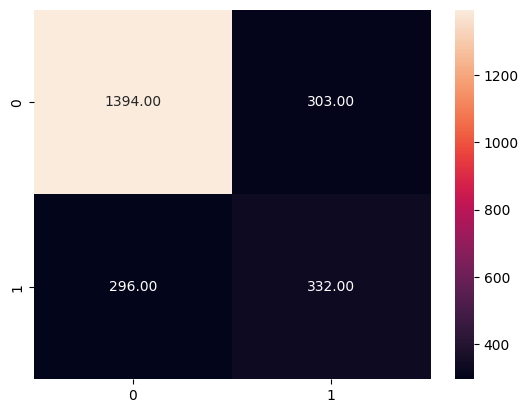

In [34]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [35]:
# save the model to disk
filename = path +'_DT_without-resampling.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7423655913978494


### Using Decision Tree Classifier

In [36]:
model = DecisionTreeClassifier()

# latih model
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# show metric classification untuk evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1697
           1       0.49      0.51      0.50       628

    accuracy                           0.72      2325
   macro avg       0.65      0.65      0.65      2325
weighted avg       0.73      0.72      0.72      2325



<Axes: >

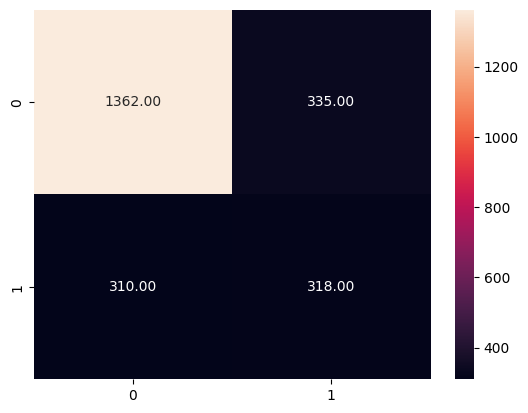

In [37]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [38]:
# save the model to disk
filename = path +'_DT.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7225806451612903


### Using K-Nearest Neighbors (KNN)

In [39]:
model = KNeighborsClassifier()
model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1697
           1       0.47      0.69      0.56       628

    accuracy                           0.70      2325
   macro avg       0.66      0.70      0.67      2325
weighted avg       0.75      0.70      0.72      2325



<Axes: >

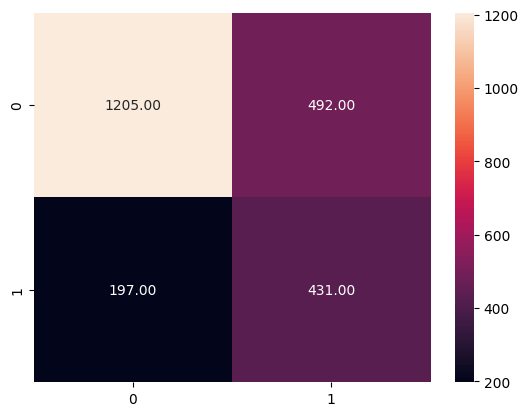

In [40]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [41]:
# save the model to disk
filename = path +'_KNN.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7036559139784946


### Using Support Vector Machine (SVM)

In [42]:
model = SVC()
model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1697
           1       0.43      0.59      0.50       628

    accuracy                           0.68      2325
   macro avg       0.63      0.65      0.63      2325
weighted avg       0.72      0.68      0.69      2325



<Axes: >

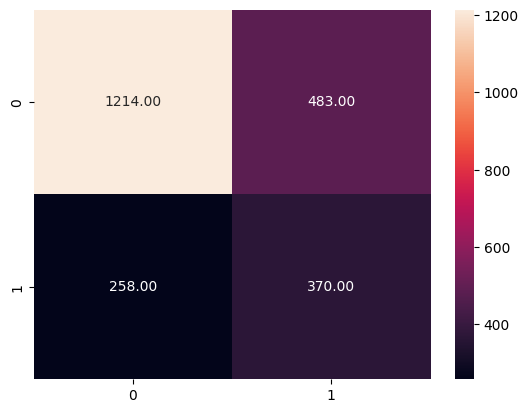

In [43]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [44]:
# save the model to disk
filename = path +'_SVM.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6812903225806451


## Model Evaluation

Dari matriks evaluasi di atas, berikut analisis performa ketiga algoritma:

1. **Decision Tree Classifier**:
   - Akurasi: 0.72
   - Presisi (untuk kelas 1): 0.49
   - Recall (untuk kelas 1): 0.51
   - F1-Score (untuk kelas 1): 0.50

2. **K-Nearest Neighbors (K-NN)**:
   - Akurasi: 0.70
   - Presisi (untuk kelas 1): 0.47
   - Recall (untuk kelas 1): 0.69
   - F1-Score (untuk kelas 1): 0.56

3. **Support Vector Machine (SVM)**:
   - Akurasi: 0.68
   - Presisi (untuk kelas 1): 0.43
   - Recall (untuk kelas 1): 0.59
   - F1-Score (untuk kelas 1): 0.50

Berdasarkan matriks evaluasi di atas, berikut beberapa kesimpulan yang dapat diambil:

- **Akurasi**: Decision Tree memiliki akurasi tertinggi (0.72), diikuti oleh K-NN (0.70) dan SVM (0.68).
- **Presisi**: Decision Tree memiliki presisi tertinggi untuk kelas 1 (0.49), diikuti oleh K-NN (0.47) dan SVM (0.43).
- **Recall**: K-NN memiliki recall tertinggi untuk kelas 1 (0.69), diikuti oleh SVM (0.59) dan Decision Tree (0.51).
- **F1-Score**: K-NN memiliki F1-Score tertinggi untuk kelas 1 (0.56), diikuti oleh Decision Tree (0.50) dan SVM (0.50).

Secara keseluruhan, **Decision Tree** memiliki performa yang lebih baik dalam hal akurasi dan presisi, sementara **K-NN** memiliki recall dan F1-Score yang lebih baik untuk class atau label 1.